In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector

In [45]:
accept = QuantumRegister(1, name="accept")
detain = QuantumRegister(1, name="detain")
bribe = QuantumRegister(1, name="bribe")
justify = QuantumRegister(1, name="justify")
ancilla = QuantumRegister(2, name="ancilla")
false_info = QuantumRegister(1, name="false_info")
passport = QuantumRegister(1, name="passport")
entry_pass = QuantumRegister(1, name="entry_pass")
id = QuantumRegister(1, name="id")

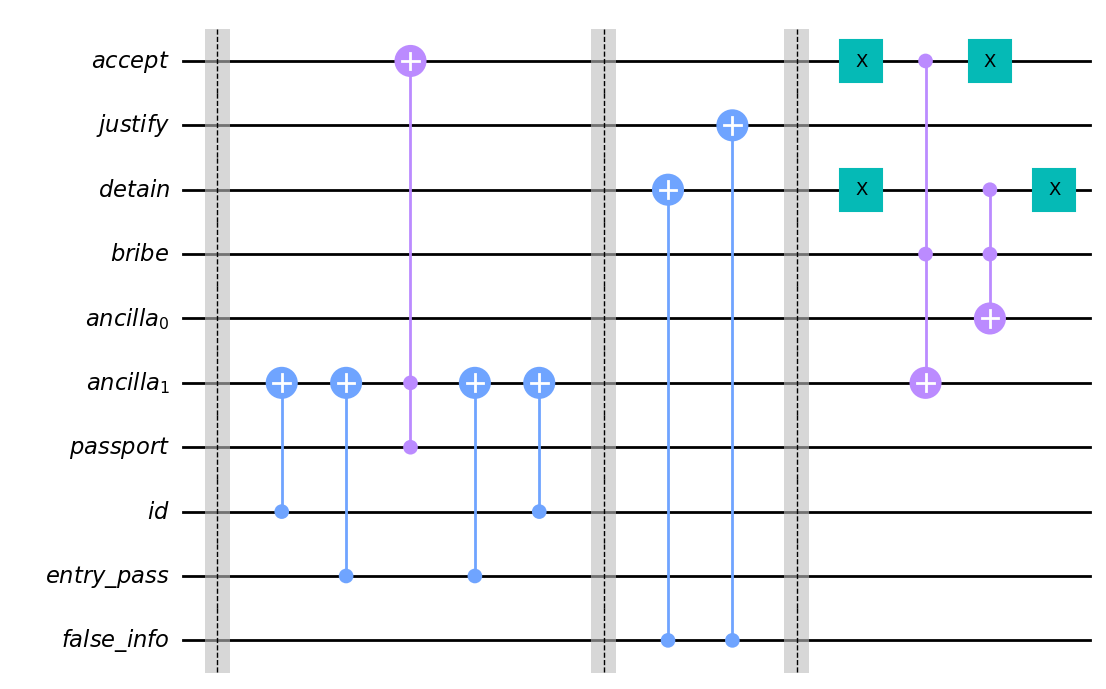

<IPython.core.display.Latex object>

In [62]:
qc = QuantumCircuit(accept, justify, detain, bribe, ancilla, passport, id, entry_pass, false_info)

qc.barrier()

qc.cx(id, ancilla[-1])
qc.cx(entry_pass, ancilla[-1])
qc.ccx(passport, ancilla[-1], accept)
qc.cx(entry_pass, ancilla[-1])
qc.cx(id, ancilla[-1])

qc.barrier()

qc.cx(false_info, detain)
qc.cx(false_info, justify)

qc.barrier()
qc.x(accept)
qc.x(detain)
qc.ccx(accept, bribe, ancilla[-1])
qc.ccx(detain, bribe, ancilla[-2])
qc.x(detain)
qc.x(accept)

display(qc.draw("mpl"))
Statevector(qc).draw("latex")

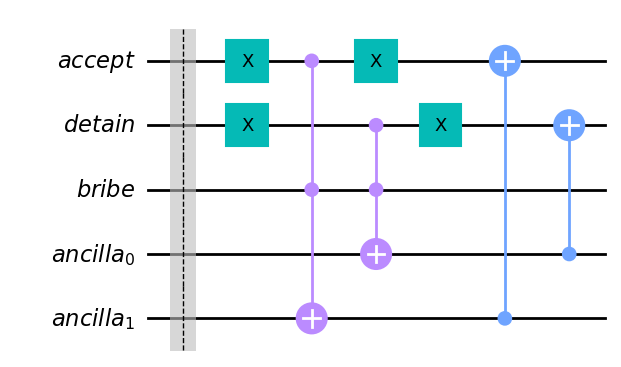

<IPython.core.display.Latex object>

In [4]:
qc = QuantumCircuit(accept, detain, bribe, ancilla)


qc.barrier()

qc.x(accept)
qc.x(detain)
qc.ccx(accept, bribe, ancilla[-1])
qc.ccx(detain, bribe, ancilla[-2])
qc.x(detain)
qc.x(accept)


qc.cx(ancilla[-1], accept)
qc.cx(ancilla[-2], detain)


display(qc.draw("mpl"))
Statevector(qc).draw("latex")

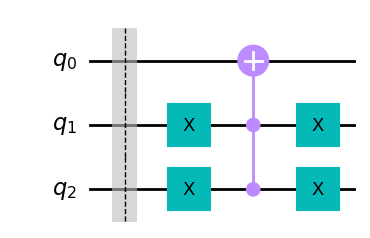

<IPython.core.display.Latex object>

In [16]:
qc_or = QuantumCircuit(3)


qc_or.barrier()

qc_or.x(range(1,3))
qc_or.ccx(2, 1, 0)
qc_or.x(range(1,3))

display(qc_or.draw("mpl"))
Statevector(qc_or).draw("latex")